#문제정의 :LinearRegression 회귀 분석 사용하여 1970년대 후반과 1980년대 초반의 자동차 연비(MPG)를 예측

기본라이브러리 불러오기

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl


#한글깨짐방지

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


[Step 1] 데이터 준비- read_csv() 함수로 자동차 연비데이터셋 가져오기

In [3]:
# csv 파일을 데이터프레임으로 변환
df = pd.read_csv('/content/auto-mpg.csv',header=None)

In [4]:
# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

데이터 살펴보기

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
#데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
#horsepower 열의 자료형 변경 (문자열-> 숫자)
df['horsepower'].unique()


array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [8]:
#'?'을 np.nan으로
df['horsepower'].replace('?',np.nan,inplace=True)

In [9]:
#누락 데이터를 삭제
df.dropna(subset=['horsepower'],axis=0,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [11]:
#'?'을 np.nan으로
df['horsepower'].replace('?',np.nan,inplace=True)

In [12]:
#누락 데이터를 삭제
df.dropna(subset=['horsepower'],axis=0,inplace=True)

In [13]:
#문자열->숫자로 변환
df['horsepower'] = df['horsepower'].astype('float')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


[Step3] 속성(feature또는variable)선택

In [15]:
#분석에 활용할 속성을 선택(연비,실린더,출력,중량)
ndf=df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


In [26]:
#속성(변수)선택 -> 다항 회귀
X = ndf[['cylinders','horsepower','weight']] #독립변수 X1, X2, X3
y = ndf['mpg'] #종속 변수 y

[Step4]데이터셋구분 -훈련용(train data)/검증용(test data)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 10)

[step5] Lasso 회귀분석 모형-sklearn 사용

In [33]:
from sklearn.linear_model import Lasso

#단순회귀분석 모형 객체 생성 후 학습 시키기
lasso001 = Lasso(alpha=5.0).fit(X_train,y_train)

[Step6] 성능 평가하기

In [34]:
#학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산 -> 결정계수 값이 클수록 모형의 예측 능력이 좋다고 판단

r_square = lasso001.score(X_test,y_test)
r_square

0.6967715771431975

In [21]:
#모형에 전체 X 데이터를 입력하여 예측한 값 y_hat으로 담기
y_hat = lr.predict(X)

In [22]:
#모형에 테스트셋 X_test 데이터를 입력하여 예측한 값 y_hat_test 으로 담기
y_hat_test = lr.predict(X_test)

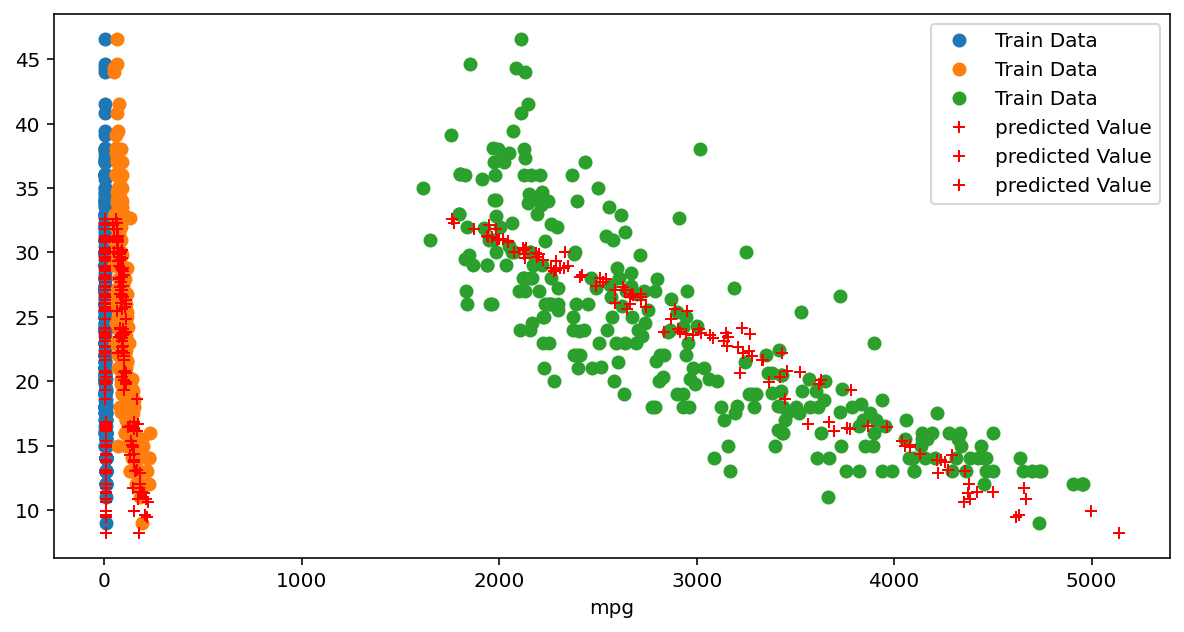

In [35]:
#train 데이터(X_train) 의 산점도와 test 데이터로 예측한 (y_hat_test) 회귀선을 그래프로 출력

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train,'o',label='Train Data') #데이터의 분포
ax.plot(X_test, y_hat_test, 'r+', label='predicted Value') #모형이 예측한 회귀선
ax.legend(loc='best')
plt.xlabel('features')
plt.xlabel('mpg')
plt.show()

In [24]:
print("훈련 세트 정확도 : {:.2f}%".format(lr.score(X_train,y_train)*100))
print("훈련 세트 정확도 : {:.2f}%".format(lr.score(X_test,y_test)*100))

훈련 세트 정확도 : 70.71%
훈련 세트 정확도 : 69.39%


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45796 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54637 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54924 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44480 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48516 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49437 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph

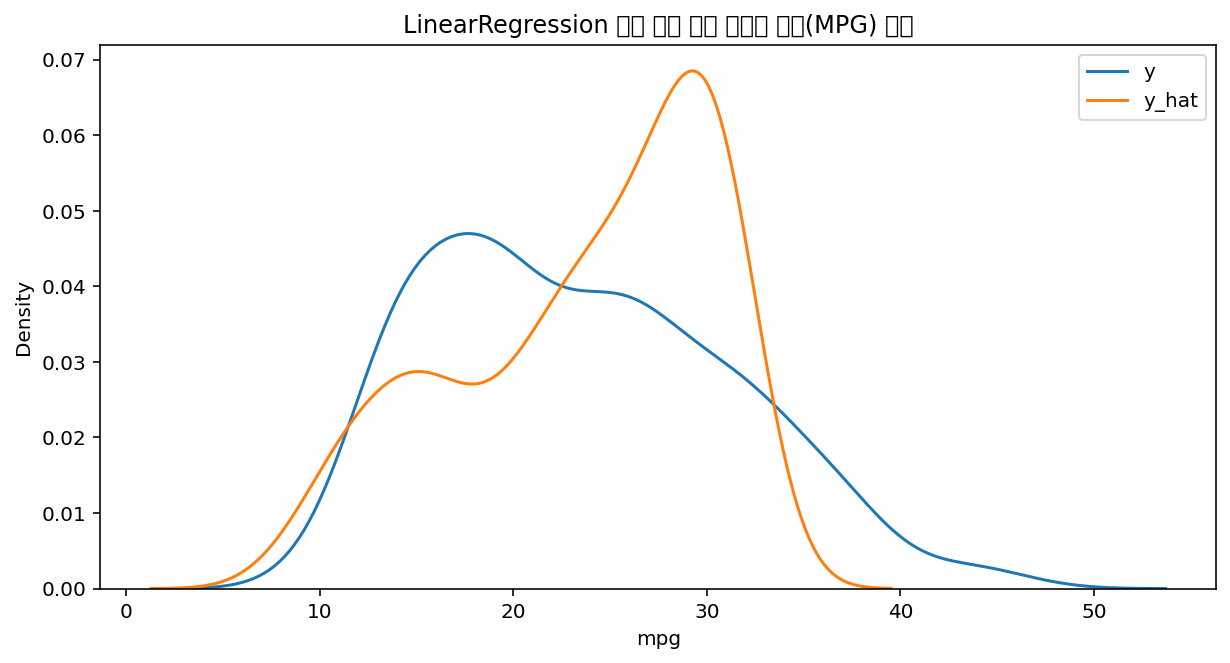

In [25]:
plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y,label='y')
ax2 = sns.kdeplot(y_hat,label='y_hat',ax=ax1)
plt.title('LinearRegression 다항 회귀 분석 자동차 연비(MPG) 예측')
plt.legend()
plt.show()